# Build and save a linear regression model to predict wine quality.
* Use the data from our white wine data set `data/winequality-white.csv`


In [1]:
# IMPORT OUR LIBRARIES



# Lets have a look at our data

In [3]:
# READ IN THE DATA USING PANDAS 


# DISPLAY THE FIRST 5 ROWS
df.head()

NameError: name 'df' is not defined

# Select your predictor features and your target variable.

The predictor features are called the independent variables, inputs, or predictors.

The dependent features are called the dependent variables, outputs, or target.

It is a common practice to denote the input features with `X` and targets with `y`.

In [3]:
# OUR THINGS AKA INPUT FEATURES ARE OUR EXPLANATORY VARIABLES
# THESE ARE WHAT WE ARE GOING TO USE TO PREDICT THE QUALITY OF THE WINE
features = 

# OUR TARGET, THE THING WE ARE TARGETING TO EXPLAIN, IS OUR DEPENDENT VARIABLE
# THIS IS OUR OUTPUT
target = 


# ISOLATE THE DATA TO JUST OUR FEATURES
X = 


# ISOLATE JUST OUR TARGET DATA, THIS IS WHAT WE ARE TRYING TO PREDICT
y = 

Typically, you need regression to answer whether and how some phenomenon influences the other or how several variables are related. For example, you can use it to determine if and to what extent the `alcohol` or `pH` impact the `quality`


# Split our data into a training set and a testing set.
We do this to avoid overfitting which is a larger concept you can learn more about [here](https://en.wikipedia.org/wiki/Overfitting) and [here](https://blog.minitab.com/blog/adventures-in-statistics-2/the-danger-of-overfitting-regression-models).

In [4]:
# SPLIT OUR DATA INTO TRAINING AND TESTING SETS, 
# 80% GOING INTO OUR TESTING, AND HOLDING OUT 20% FOR OUR TESTING
X_train, X_test, y_train, y_test = 

# Initialize our Linear Regression model.

In [5]:
# INITIALIZE OUR LIN REG MODEL
model = 

# Use our training data to fit aka train our model.
* We could spend a whole semester going into the math behind the fitting model process. 
* At the highest level, it finds the best trend line for each of the input variables.  
* I encourage you to read this article explaining OLS in further detail [here](https://towardsdatascience.com/simple-linear-regression-and-ols-introduction-to-the-theory-1b48f7c69867).

In [6]:
# THIS IS THE HEART OF OUR MODEL'S PROCESS
# IT TAKES IN THE TRAINING DATA AND DOES ALL THE FANCY MATH
model.fit(,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make new predicitions using our testing data.

In [7]:
y_pred = 

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model.  
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember, 0 is bad .3 is okay .6 is good .9+ is amazing.

In [10]:
r_squared = 
print(r_squared)

0.32664027269869844


# Now find the Mean Absolute Error of our model

In [ ]:
# Is MAE always between 0-1?
metrics.mean_absolute_error(y_test, y_pred)

___
# Inspecting our coefficients.

### If you only remember one thing from this lesson let it be this... <br><br> The _coefficients_ of our model explain how each feature impact wine quality.

In [12]:
coefficients = pd.DataFrame(model.coef_, columns=features).T

coefficients.columns = ['coefficient']

coefficients

,coefficient
fixed acidity,0.047962
volatile acidity,-1.118401
citric acid,-0.276228
residual sugar,0.020476
chlorides,-1.768907
free sulfur dioxide,0.005350
total sulfur dioxide,-0.003449
density,-36.710223
pH,-0.347701
sulphates,0.929729


# Looking at the coefficient for _suplhates_ above, the coefficient means that... <br><br> A 1 unit increase in _suplhates_ will lead to an increase of 0.9 in Quality of wine.


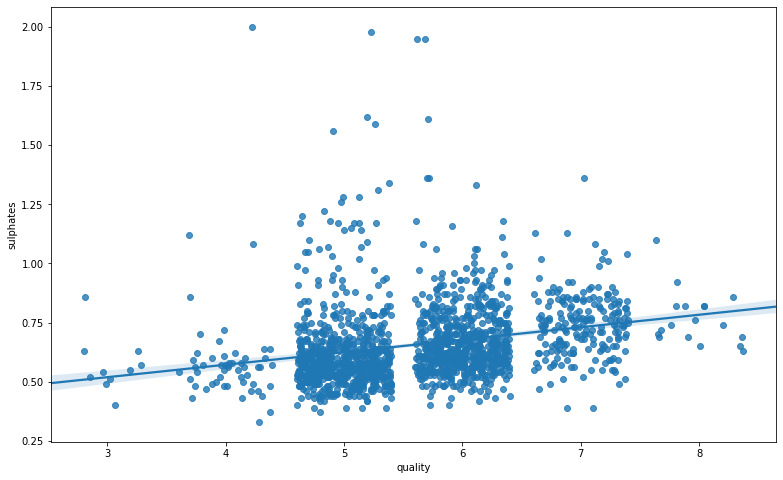

In [14]:
plt.figure(figsize=(13,8))
sns.regplot(x='quality', y='sulphates', data=df, x_jitter=0.4);

# Now, lets use our trained model to make new predictions. 
* Use the `X_test` data we held out at the beginning that the model has not seen yet.
* Plug that into the model.predict function
* Save the results so we can compare them with the actual values (y_test)

In [18]:
# USE OUR TESTING DATA TO MAKE NEW PREDICTIONS
test_pred = model.predict(X_test)


# Now, lets compare the test predictions to the test values. 

In [20]:
# CREATE A PANDAS DATAFRAME USING OUR PREDICTIONS 
df_preds = pd.DataFrame(test_pred, columns=['predictions'])

df_preds['actual'] = y_test

df_preds['abs_error'] = abs(df_preds['predictions'] - df_preds['actual'])

df_preds.head()

,predictions,actual,abs_error
0,5.536655,5,0.536655
1,5.375703,6,0.624297
2,6.099949,6,0.099949
3,5.727178,6,0.272822
4,6.688794,6,0.688794


# LETS MANUALLY MAKE A PREDICTION FOR THE FIRST VALUE IN OUR DATA


In [ ]:
# PLACE THE FIRST VALUE FROM OUR DATA INTO OUR COEFFICIENTS DATAFRAME
coefficients['one_wine_review'] = df[features].head(1).T

# MULTIPLY EACH FEATURE BY THEIR COEFFICIENTS 
coefficients['coef_x_review'] = coefficients['coefficient'] * coefficients['one_wine_review']

# DISPLAY THE DATAFRAME
coefficients

# TAKE SUM AND ADD THE Y-INTERCEPT
wine_quality_prediction = model.intercept_ + coefficients['coef_x_review'].sum()

# DISPLAY THE PREDICTION
wine_quality_prediction

# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [27]:
import pickle

# NAME YOUR MODEL 
filename = 'red_wine_model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))



In [26]:
## HOW TO LOAD IT FOR FUTURE USE
# model = pickle.load(open(filename, 'rb'))

0.32664027269869844

# NOT SURE HOW TO WRAP THIS UP
* THINGS YOU CAN DO TO IMPROVE YOUR SCORE...
* AVOID OVERFITTING - 
* P-VALUES?

In [ ]:
# LOOKING AT THE FIRST WINE SAMPLE FROM OUR DATA


In [ ]:
model.predict(df[features].head(1))

# WITH ERIC

In [ ]:
df.plot(kind='scatter', x='citric acid', y='fixed acidity', figsize=(13,8))


In [ ]:
model = LinearRegression()
x = df['citric acid'].values.reshape(-1, 1)
y = df['fixed acidity'].values.reshape(-1,1)
model.fit(x, y)

y_intercept = model.intercept_

coef = model.coef_


In [ ]:
import numpy as np

In [ ]:
x_new = np.linspace(0, 1, 2)

y_new = model.predict(x_new[:, np.newaxis])

plt.figure(figsize=(13, 8))

ax = plt.axes()

ax.scatter(x, y)

ax.plot(x_new, y_new, color='r')

ax.set_xlabel('x')

ax.set_ylabel('y')

ax.axis('tight')

plt.show()

In [ ]:
# WHY IS THIS THE CORRECT LINE...
# ITS THE FUNCTION THAT REDUCES THE ERROR THE MOST... 
# IE: THE AMOUNT OF SPACE BETWEEN EVERY DOT AND THE LINE

In [ ]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(df['x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

In [ ]:
df['citric acid'].values.reshape(-1, 1)

### BELOW HERE ARE SCRAPS ###
---

In [ ]:
# for feature in features:
#     sns.set()
#     sns.relplot(data = df, x = feature, y = 'quality', kind='line', height=5, aspect=1)

In [ ]:
df.hist(bins=50, figsize=(20,15), color='maroon');

In [ ]:
import statsmodels.api as sm
m = sm.OLS(df['quality'], df[features])
results = m.fit()

In [ ]:
results.summary()

In [ ]:
house_size = np.random.random??

In [ ]:
import numpy as np
house_size = np.random.randint(low=1000, high=3000,size=20)
house_price = house_size * 90 + 10000
house_df = pd.DataFrame(house_size,columns=['size'])
house_df['price'] = house_price
house_df

house_df['noiser_price'] = house_df['price'].apply(lambda x: x + np.random.randint(-1000,1000))
house_df

In [ ]:
house_size = np.random.randint(low=1000, high=3000,size=20)
house_price = house_size * 90 + 10000
house_df = pd.DataFrame(house_size,columns=['size'])
house_df['price'] = house_price

house_df['price'] = house_df['price'].apply(lambda x: x + np.random.randint(-10000,10000))
house_df.to_csv('data/housing.csv', index=False)